# **SUPERMARKET SALES PREDICTION**

In this notebook, we attempt to explore our supermarket sales dataset from Kaggle and try build a machine learning model that will best predict future sales based on the feature variables provided

## Importing the necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Loading the Dataset

In [6]:
df = pd.read_csv('data/supermarket_sales.csv')
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Initial Data Analysis

We will perform preliminary Data Analysis to get a better understanding of the data

In [7]:
print(df.shape, df.size)

(1000, 17) 17000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Check for missing values

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
df['Customer type'].nunique()

2

In [16]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

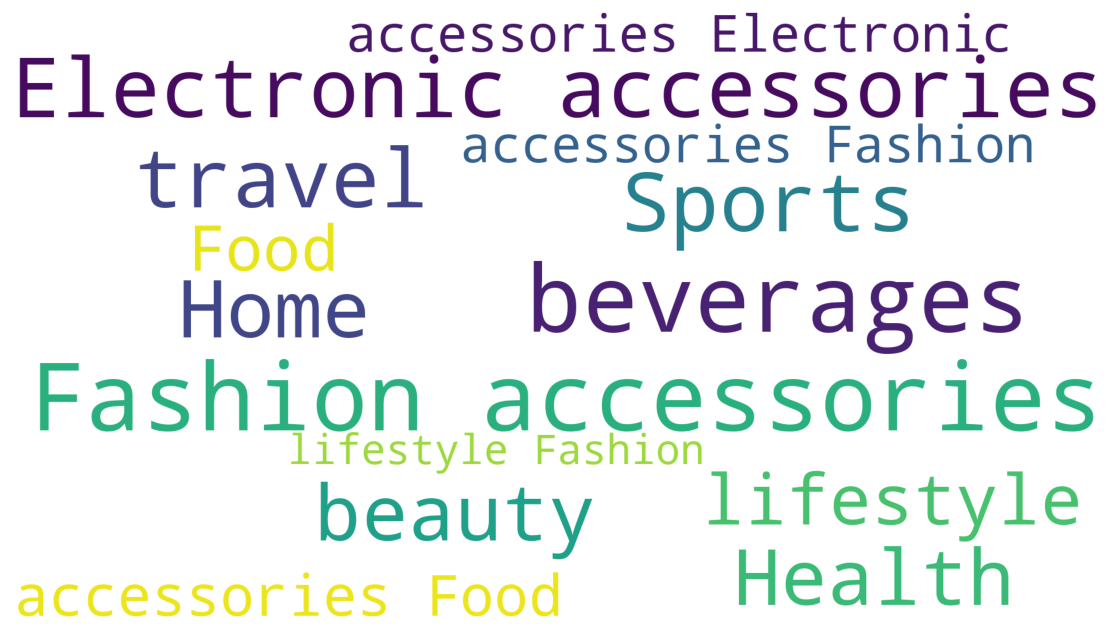

In [17]:
from wordcloud import WordCloud
plt.subplots(figsize=(20, 8))
wordcloud = WordCloud(background_color='White', width=1920, height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('output/cast.png')
plt.show()

## Exploratory Data Analysis

We will perform Exploratory Data Analysis to get a better understanding of the data before we start building our models

### Scatter Plot

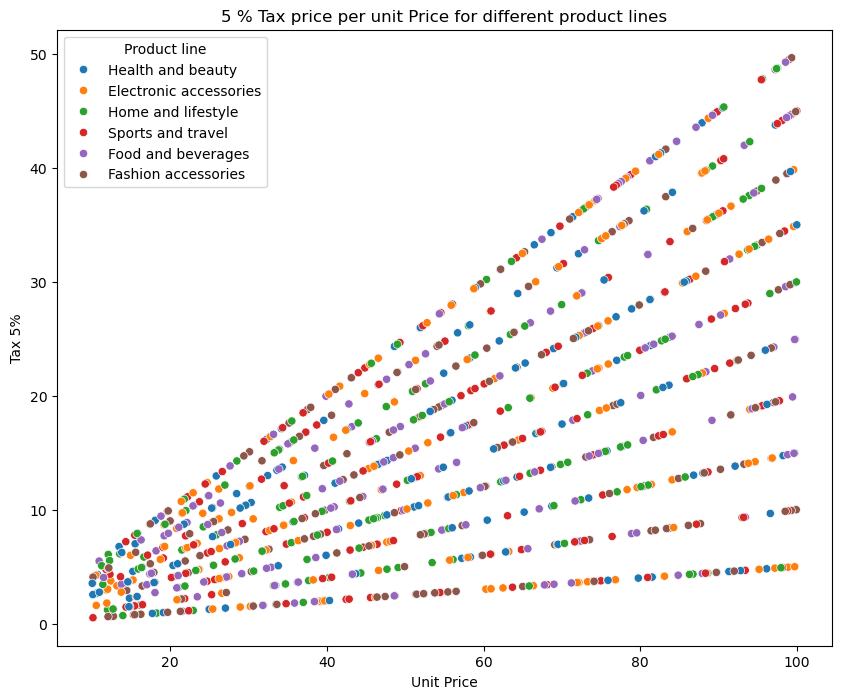

In [22]:
width = 10
height = 8
fig, ax = plt.subplots(figsize = (width, height))
sns.scatterplot(data = df,
           x = 'Unit price',
           y = 'Tax 5%',
           hue = 'Product line')
plt.title('5 % Tax price per unit Price for different product lines')
plt.xlabel('Unit Price')
plt.ylabel('Tax 5%')
plt.show()

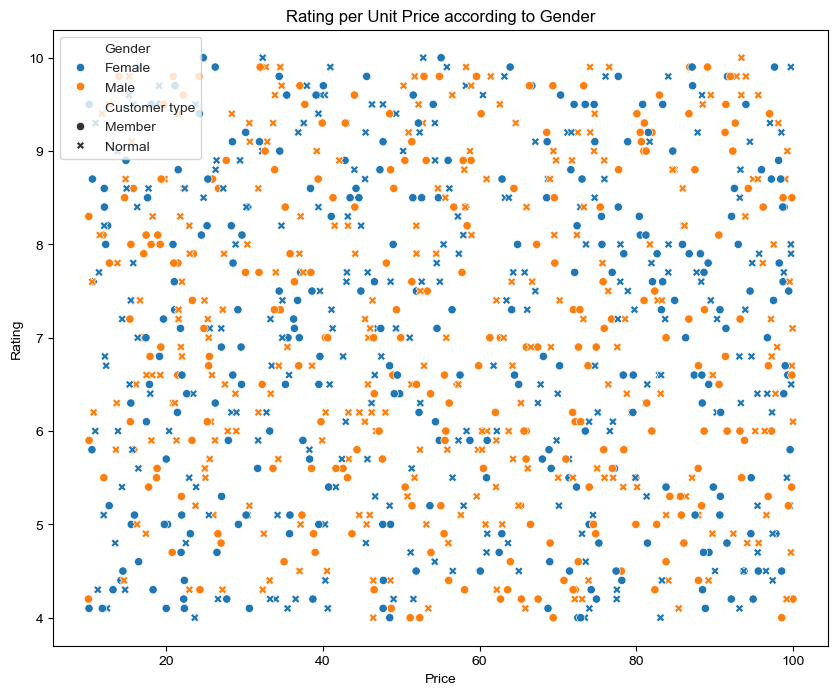

In [24]:
# Lets try a scatter on unit price and rating based on gender
fig, ax = plt.subplots(figsize = (width, height))
sns.set_style(style = 'whitegrid')
sns.scatterplot(data=df,
               x='Unit price',
               y='Rating',
               hue='Gender',
               style= 'Customer type')
ax.set(title='Rating per Unit Price according to Gender', xlabel='Price', ylabel='Rating')
plt.show()

### BoxPlot

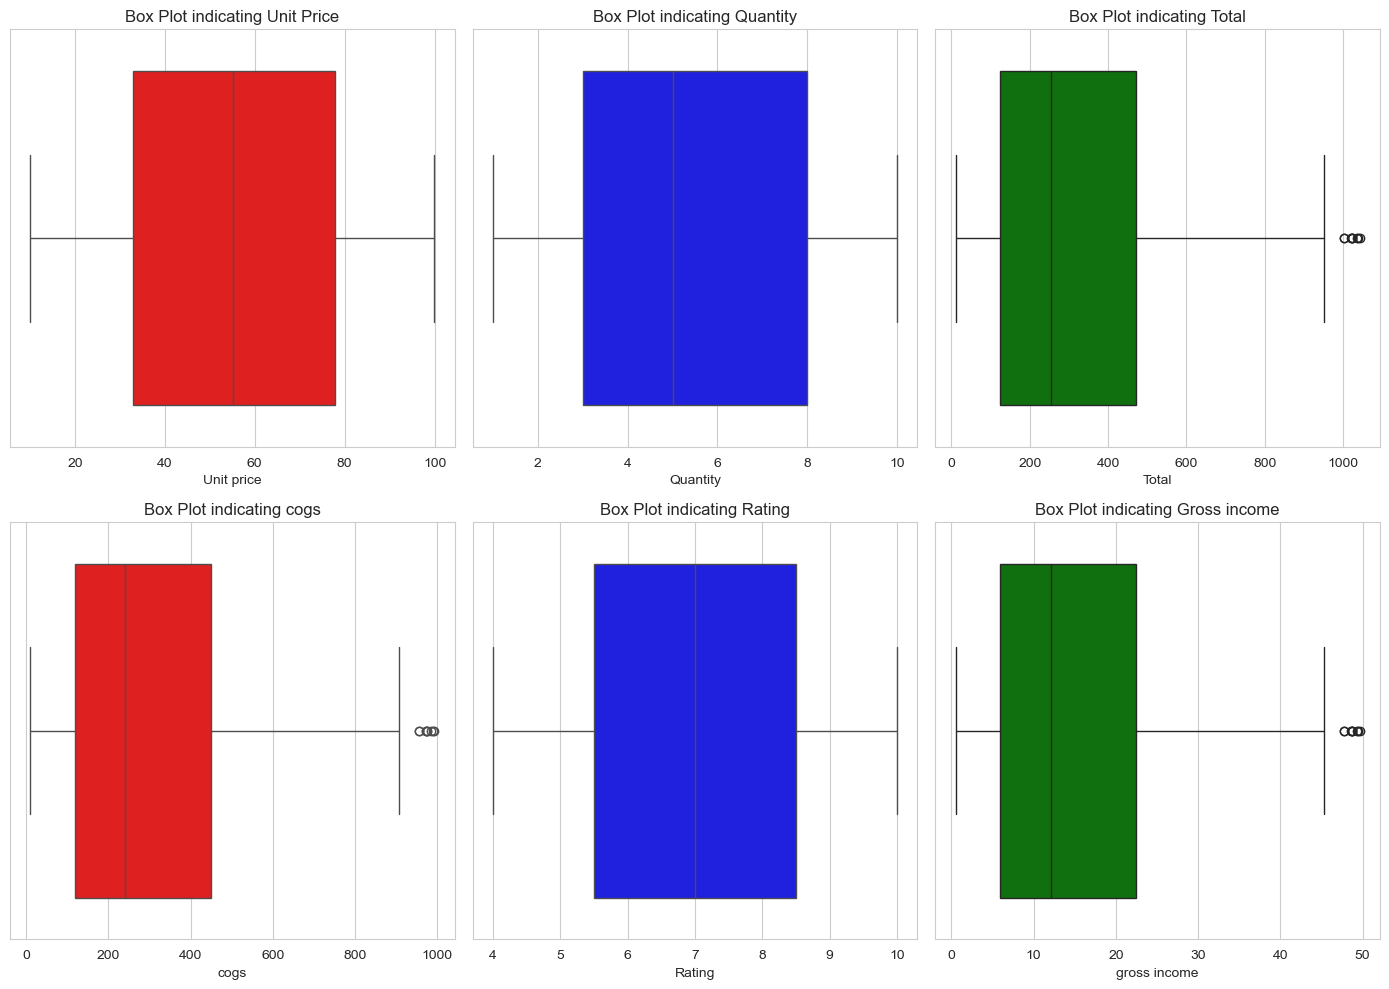

In [38]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 10))
ax0 = sns.boxplot(data= df,
           x= 'Unit price',
            color = 'red', ax = ax0)
ax1 = sns.boxplot(x = 'Quantity', 
                 data= df, 
                 color = 'blue', 
                  ax = ax1)
ax2 = sns.boxplot(x='Total', 
                  data=df,
                 color = 'green',
                 ax=ax2)
ax3 = sns.boxplot(x='cogs', 
                  data=df, 
                 color = 'red',
           ax= ax3)
ax4 = sns.boxplot(data = df,
                 x = 'Rating',
                 color = 'blue',
                 ax = ax4)
ax5 = sns.boxplot(data = df,
                 x = 'gross income',
                 color = 'green',
                 ax = ax5)
ax0.set(title = 'Box Plot indicating Unit Price')
ax1.set(title = 'Box Plot indicating Quantity')
ax2.set(title = 'Box Plot indicating Total')
ax3.set(title = 'Box Plot indicating cogs')
ax4.set(title = 'Box Plot indicating Rating')
ax5.set(title = 'Box Plot indicating Gross income')
plt.tight_layout()
plt.show()

## KDEPlot

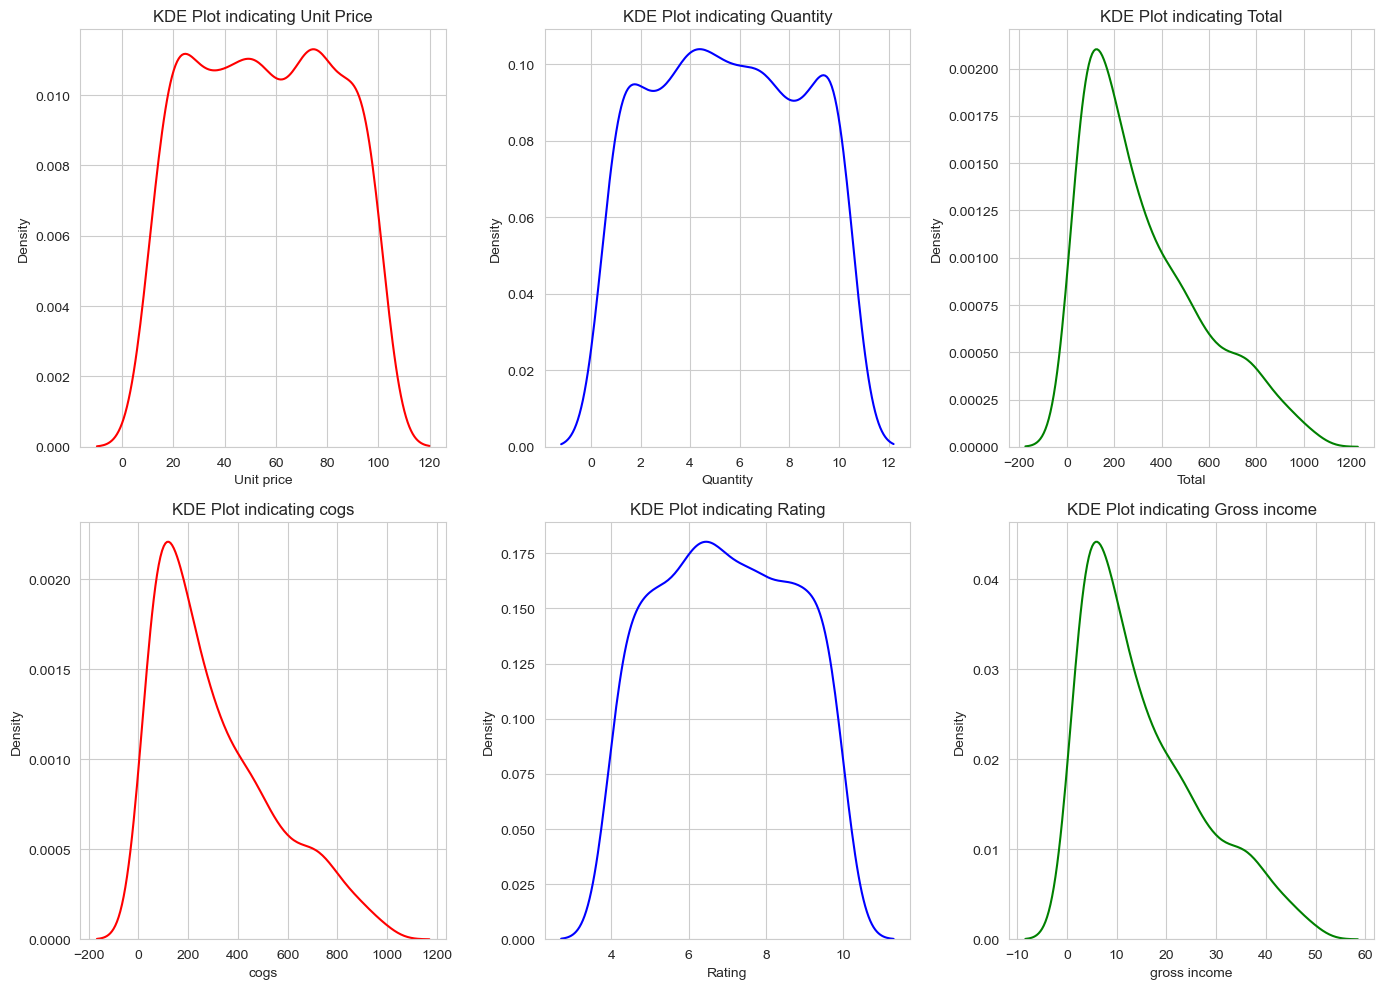

In [41]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 10))
ax0 = sns.kdeplot(data= df,
           x= 'Unit price',
            color = 'red', ax = ax0)
ax1 = sns.kdeplot(x = 'Quantity', 
                 data= df, 
                 color = 'blue', 
                  ax = ax1)
ax2 = sns.kdeplot(x='Total', 
                  data=df,
                 color = 'green',
                 ax=ax2)
ax3 = sns.kdeplot(x='cogs', 
                  data=df, 
                 color = 'red',
           ax= ax3)
ax4 = sns.kdeplot(data = df,
                 x = 'Rating',
                 color = 'blue',
                 ax = ax4)
ax5 = sns.kdeplot(data = df,
                 x = 'gross income',
                 color = 'green',
                 ax = ax5)
ax0.set(title = 'KDE Plot indicating Unit Price')
ax1.set(title = 'KDE Plot indicating Quantity')
ax2.set(title = 'KDE Plot indicating Total')
ax3.set(title = 'KDE Plot indicating cogs')
ax4.set(title = 'KDE Plot indicating Rating')
ax5.set(title = 'KDE Plot indicating Gross income')
plt.tight_layout()
plt.show()

## PiarPlot

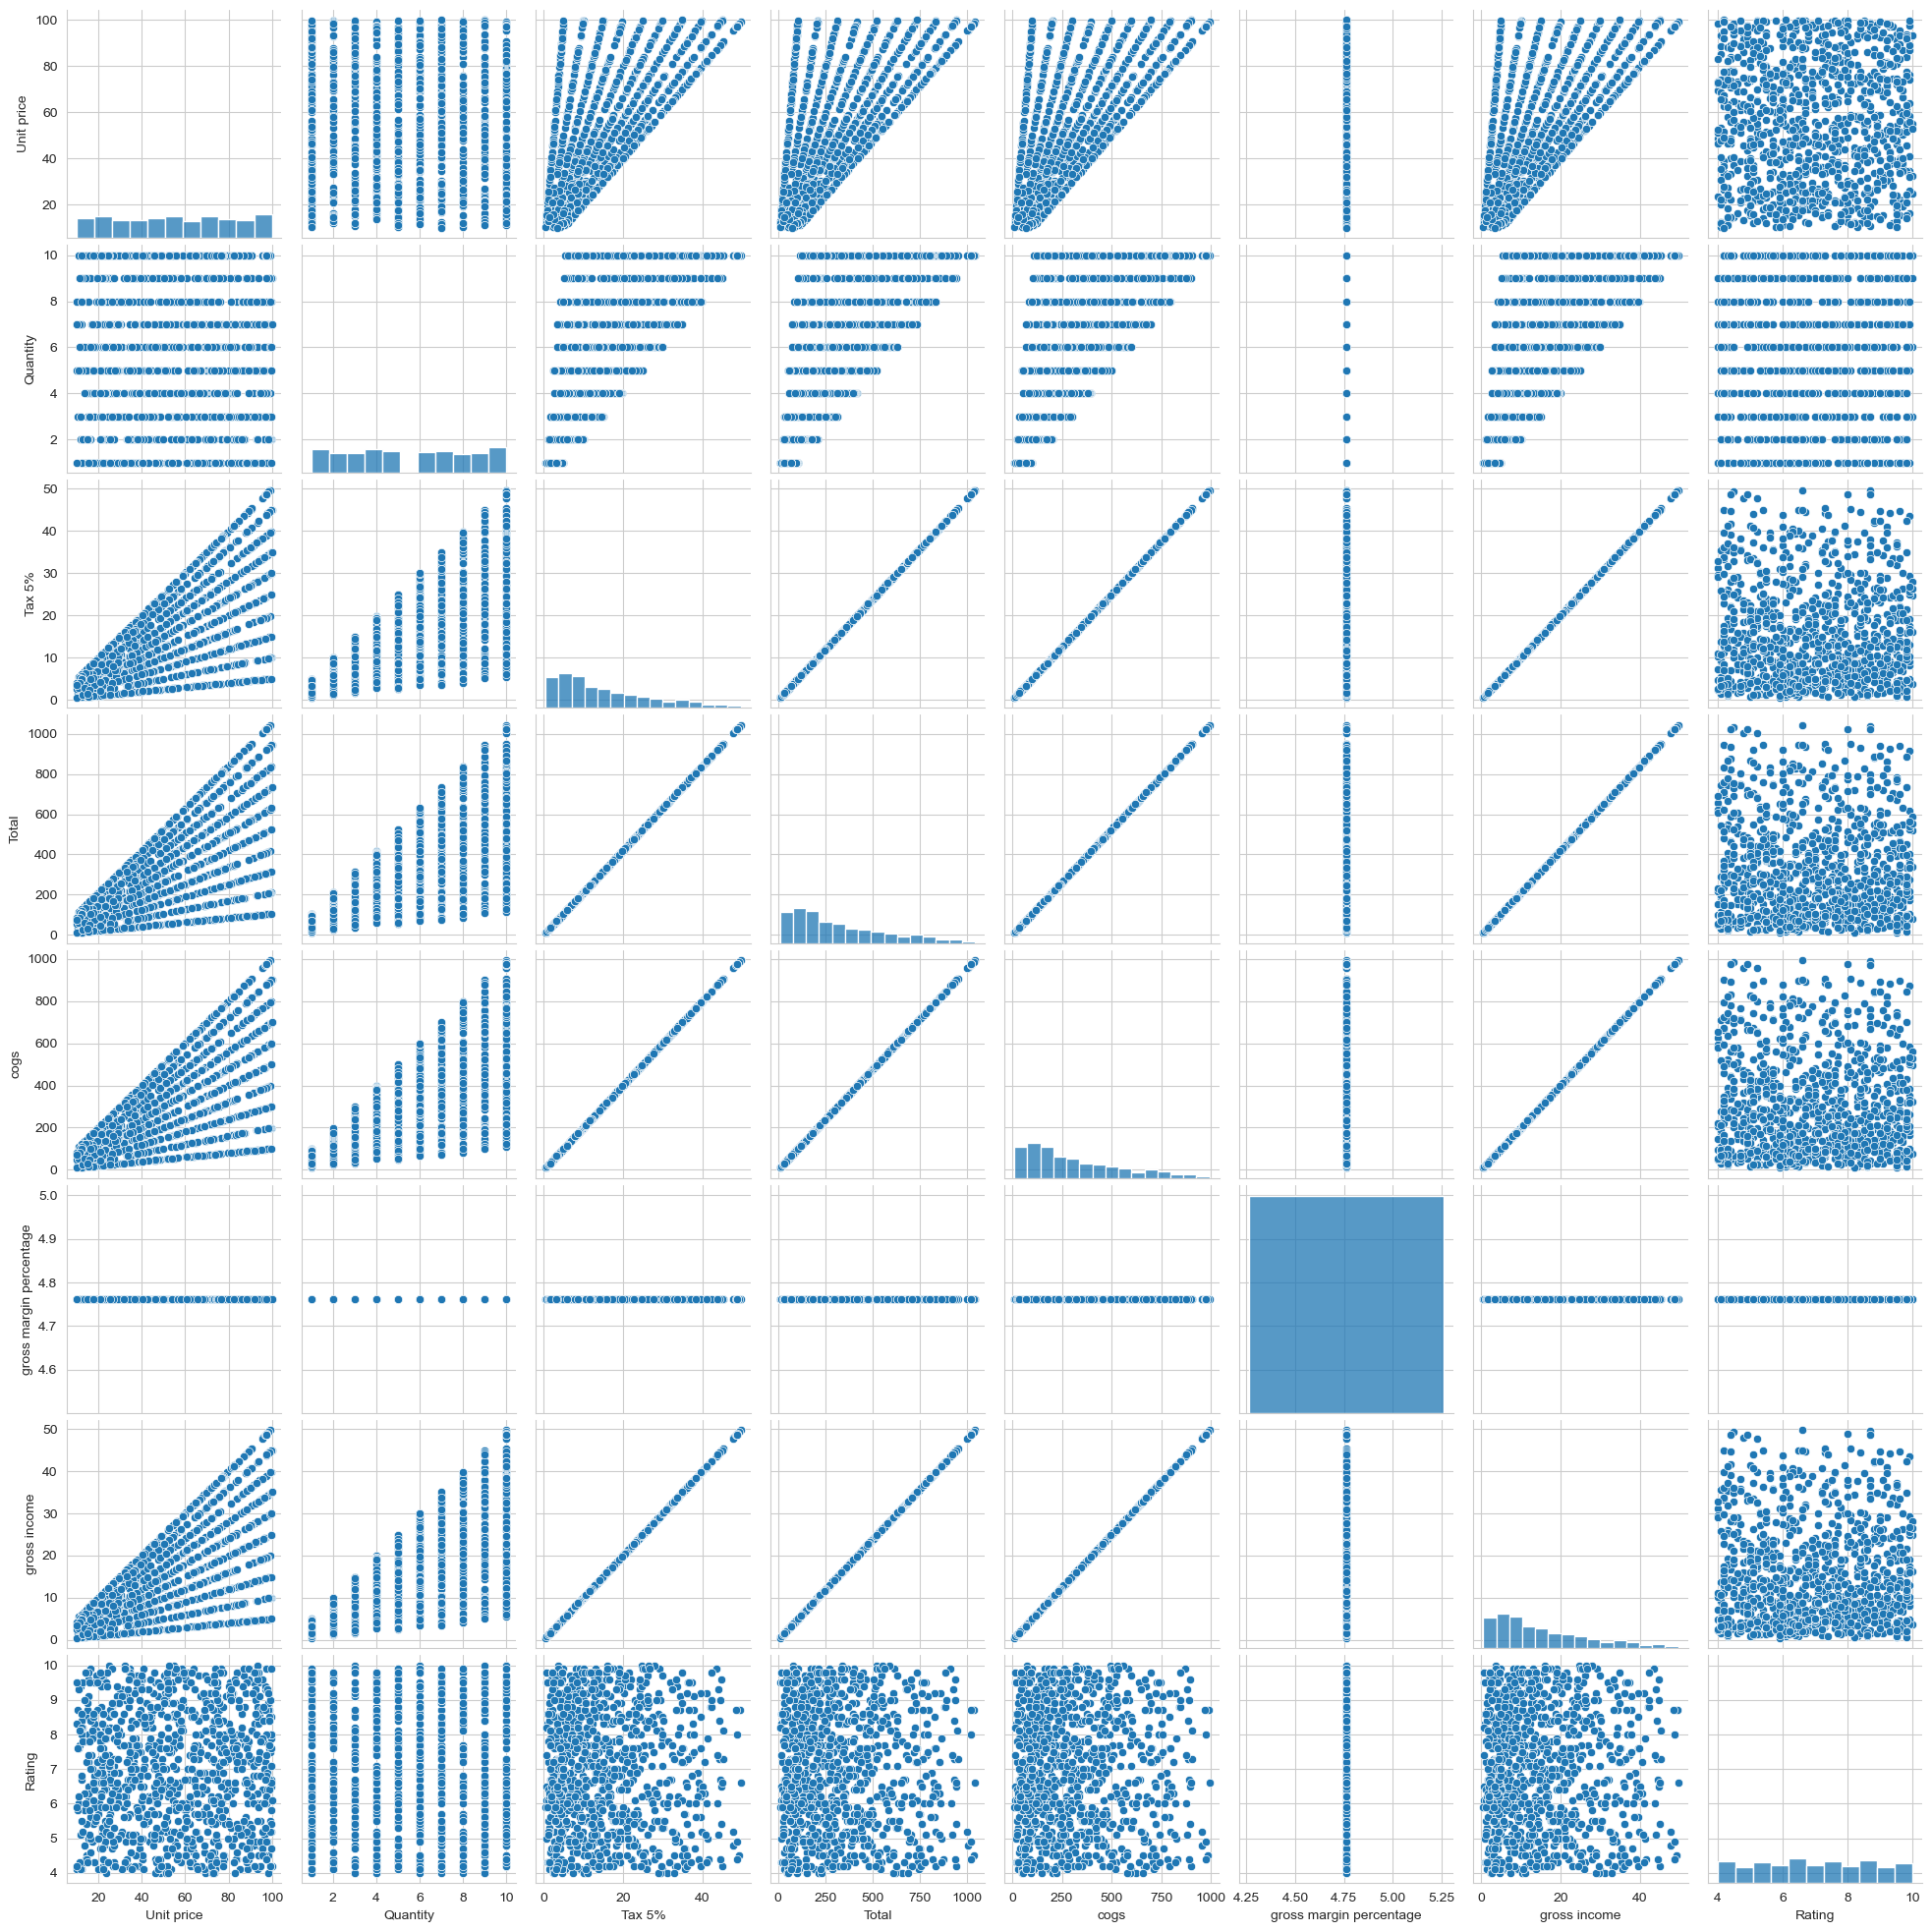

In [44]:
sns.pairplot(data=df)
plt.show()

## BarPlot

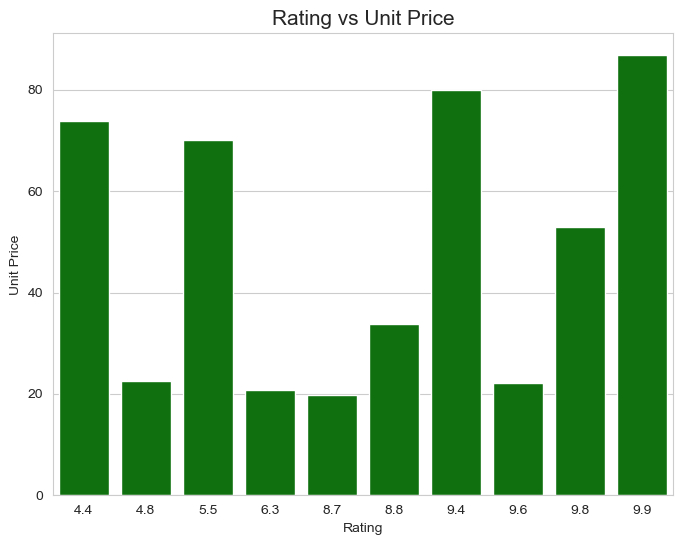

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(data = df[170:180],
           x='Rating', y='Unit price',
            color = 'green'
)
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

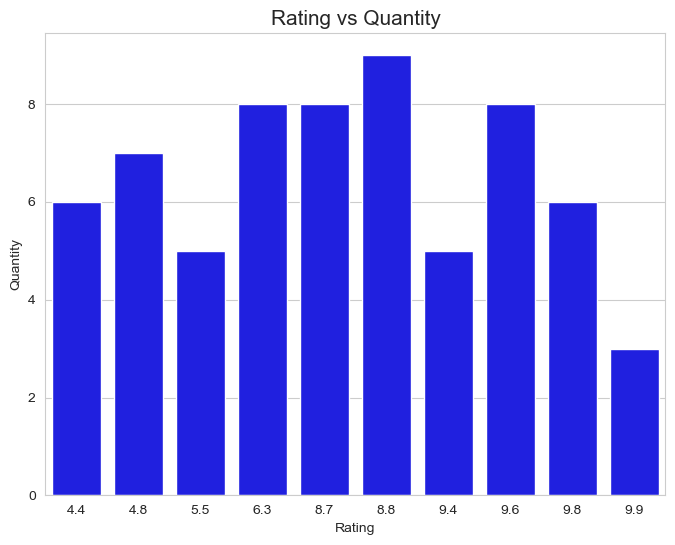

In [48]:
#plt.style.use("default")
plt.figure(figsize=(8,6))
sns.barplot(x="Rating", y="Quantity", data=df[170:180], color = 'b')
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [50]:
# Checking correlation of variables in data frame
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [55]:
# Finding categorical features in dataframe
list_1 = list(df.columns)

list_cate = []

for i in list_1:
    if df[i].dtypes == 'object':
        list_cate.append(i)

print(list_cate)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


## Feature Engineering

### Label Encoding

![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)

In [57]:
#Instantiate the encoder
le = LabelEncoder()

#encode our categorical columns
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [58]:
df.dtypes

Invoice ID                   int32
Branch                       int32
City                         int32
Customer type                int32
Gender                       int32
Product line                 int32
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                         int32
Time                         int32
Payment                      int32
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

## Splitting our dataset into Training and Testing Datasets

In [59]:
#Define our target variable
y=df['Gender']
#Define our independent variables
x = df.drop('Gender', axis=1)

In [79]:
# Split the variables into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Building Machine Learning Models

### 1. K Nearest Neighbor

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [84]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [85]:
y_hat = knn.predict(x_test)
print(f'The Classification Report is: \n {classification_report(y_test, y_hat)}')
print(f'The Confusion Matrix is: \n {confusion_matrix(y_test, y_hat)}')
print(f'Training Score is: \n {knn.score(x_train, y_train)*100 :.2f}')

The Classification Report is: 
               precision    recall  f1-score   support

           0       0.46      0.66      0.54       149
           1       0.42      0.25      0.31       151

    accuracy                           0.45       300
   macro avg       0.44      0.45      0.43       300
weighted avg       0.44      0.45      0.43       300

The Confusion Matrix is: 
 [[ 98  51]
 [114  37]]
Training Score is: 
 71.43


### 2. Decision Tree

A **decision tree** is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

![](https://images.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)

In [93]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=123, criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=123)

In [94]:
y_hat2 = dtree.predict(x_test)
print(f'The Classification Report is: \n {classification_report(y_test, y_hat2)}')
print(f'The confusion matrix is: \n {confusion_matrix(y_test, y_hat2)}')
print(f'The Training score is: \n {dtree.score(x_train, y_train)*100 :.2f}')

The Classification Report is: 
               precision    recall  f1-score   support

           0       0.52      0.66      0.58       149
           1       0.54      0.38      0.45       151

    accuracy                           0.52       300
   macro avg       0.53      0.52      0.51       300
weighted avg       0.53      0.52      0.51       300

The confusion matrix is: 
 [[99 50]
 [93 58]]
The Training score is: 
 81.71


### 3. Random Forest

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.

![](https://media.geeksforgeeks.org/wp-content/uploads/20240701170624/Random-Forest-Algorithm.webp)

In [95]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [97]:
y_pred = rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(f"Training Score: \n{rfc.score(x_train,y_train)*100:.2f}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.55      0.52       149
           1       0.50      0.44      0.47       151

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Confusion Matrix:
 [[82 67]
 [84 67]]
Training Score: 
100.00


## Conclusion

As seen above the best module to use would be the Random Forest Classifier due to its high trining accuracy